In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
DATA_DIR = '../pickles'

In [3]:
df = pd.read_pickle(os.path.join(DATA_DIR, 'station1_normalized.pkl'))
df.head(10)

,date,ref,NO2_61FD,NO2_61F0,NO2_61EF,rh,t_grad,pressure,temp,pluvio
0,2017-09-28 10:15:00,38.5,-0.324687,-0.487027,0.433465,0.167023,-1.039505,0.375594,0.898638,0.0
1,2017-09-28 10:30:00,32.3,-0.343192,-0.325877,-0.412283,0.083982,-1.094050,0.375594,0.946776,0.0
2,2017-09-28 10:45:00,38.5,-0.010107,-0.161505,-0.198236,0.065528,-0.984961,0.375594,0.970844,0.0
3,2017-09-28 11:00:00,29.7,-0.386370,-0.554710,-0.339194,-0.063647,-0.984961,0.356064,1.091187,0.0
4,2017-09-28 11:15:00,19.4,-0.386370,-0.422567,-0.412283,-0.146688,-1.203138,0.375594,1.163393,0.0
5,2017-09-28 11:30:00,10.8,-0.386370,-0.619170,-0.412283,-0.238957,-1.039505,0.375594,1.259668,0.0
6,2017-09-28 11:45:00,12.4,-0.386370,-0.586940,-0.412283,-0.358905,-1.203138,0.375594,1.283736,0.0
7,2017-09-28 12:00:00,12.3,-0.386370,-0.619170,-0.412283,-0.405039,-1.148594,0.375594,1.307805,0.0
8,2017-09-28 12:15:00,9.7,-0.386370,-0.619170,-0.412283,-0.423493,-1.312227,0.356064,1.355942,0.0
9,2017-09-28 12:30:00,13.8,-0.386370,-0.619170,-0.412283,-0.552668,-1.475859,0.356064,1.548491,0.0


In [4]:
def from_dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh', 't_grad', 'pressure', 'pluvio']]),
            np.array(df['ref']))

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

In [5]:
def lstm(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    #model.add(Dense(nb_units, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    
    return model

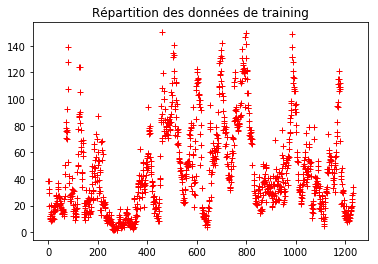

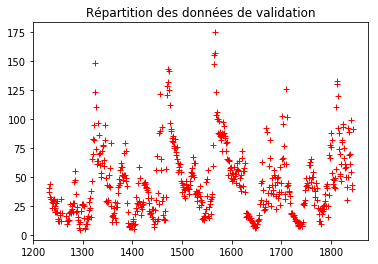

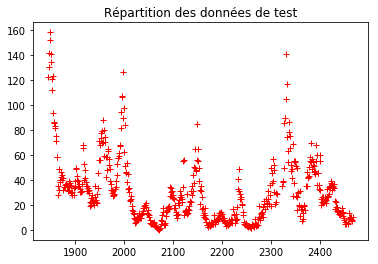

In [6]:
df_train, df_test = split_dataframe(df, 0.5)
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = from_dataframe_to_xy(df_train)
X_valid, y_valid = from_dataframe_to_xy(df_valid)
X_test, y_test = from_dataframe_to_xy(df_test)

plt.plot(df_train['ref'], '+r')
plt.title('Répartition des données de training')
plt.show()

plt.plot(df_valid['ref'], '+r')
plt.title('Répartition des données de validation')
plt.show()

plt.plot(df_test['ref'], '+r')
plt.title('Répartition des données de test')
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid= X_valid.reshape((X_valid.shape[0], 1,  X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = lstm(32, X_train.shape[1:])
early_stopping = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 1s - loss: 3219.2789 - val_loss: 2810.1833
Epoch 2/1000
1206/1206 [==============================] - 0s - loss: 3216.0976 - val_loss: 2805.8760
Epoch 3/1000
1206/1206 [==============================] - 0s - loss: 3211.0409 - val_loss: 2800.3414
Epoch 4/1000
1206/1206 [==============================] - 0s - loss: 3204.8008 - val_loss: 2793.2496
Epoch 5/1000
1206/1206 [==============================] - 0s - loss: 3196.3698 - val_loss: 2783.9804
Epoch 6/1000
1206/1206 [==============================] - 0s - loss: 3184.9845 - val_loss: 2771.2485
Epoch 7/1000
1206/1206 [==============================] - 0s - loss: 3169.0885 - val_loss: 2755.0654
Epoch 8/1000
1206/1206 [==============================] - 0s - loss: 3148.0026 - val_loss: 2733.6168
Epoch 9/1000
1206/1206 [==============================] - 0s - loss: 3120.8510 - val_loss: 2706.1749
Epoch 10/1000
1206/1206 [===================

1206/1206 [==============================] - 0s - loss: 355.6715 - val_loss: 433.5531
Epoch 82/1000
1206/1206 [==============================] - 0s - loss: 349.7859 - val_loss: 429.6042
Epoch 83/1000
1206/1206 [==============================] - 0s - loss: 344.1491 - val_loss: 424.4757
Epoch 84/1000
1206/1206 [==============================] - 0s - loss: 338.3510 - val_loss: 419.8086
Epoch 85/1000
1206/1206 [==============================] - 0s - loss: 332.8021 - val_loss: 415.0820
Epoch 86/1000
1206/1206 [==============================] - 0s - loss: 327.2737 - val_loss: 410.9097
Epoch 87/1000
1206/1206 [==============================] - 0s - loss: 321.8871 - val_loss: 406.4020
Epoch 88/1000
1206/1206 [==============================] - 0s - loss: 316.5033 - val_loss: 402.3683
Epoch 89/1000
1206/1206 [==============================] - 0s - loss: 311.3554 - val_loss: 397.9096
Epoch 90/1000
1206/1206 [==============================] - 0s - loss: 306.1650 - val_loss: 393.9618
Epoch 91/1000


1206/1206 [==============================] - 0s - loss: 136.3106 - val_loss: 224.6515
Epoch 163/1000
1206/1206 [==============================] - 0s - loss: 135.5311 - val_loss: 222.8130
Epoch 164/1000
1206/1206 [==============================] - 0s - loss: 134.7984 - val_loss: 222.0875
Epoch 165/1000
1206/1206 [==============================] - 0s - loss: 134.0324 - val_loss: 219.6209
Epoch 166/1000
1206/1206 [==============================] - 0s - loss: 133.2962 - val_loss: 218.5087
Epoch 167/1000
1206/1206 [==============================] - 0s - loss: 132.5634 - val_loss: 217.1249
Epoch 168/1000
1206/1206 [==============================] - 0s - loss: 131.8568 - val_loss: 215.5412
Epoch 169/1000
1206/1206 [==============================] - 0s - loss: 131.1492 - val_loss: 214.5825
Epoch 170/1000
1206/1206 [==============================] - 0s - loss: 130.4523 - val_loss: 212.6067
Epoch 171/1000
1206/1206 [==============================] - 0s - loss: 129.7887 - val_loss: 211.0222
Epoch

1206/1206 [==============================] - 0s - loss: 96.7340 - val_loss: 134.9823
Epoch 244/1000
1206/1206 [==============================] - 0s - loss: 96.4373 - val_loss: 134.1744
Epoch 245/1000
1206/1206 [==============================] - 0s - loss: 96.1876 - val_loss: 134.1376
Epoch 246/1000
1206/1206 [==============================] - 0s - loss: 95.8925 - val_loss: 133.1130
Epoch 247/1000
1206/1206 [==============================] - 0s - loss: 95.4962 - val_loss: 132.0713
Epoch 248/1000
1206/1206 [==============================] - 0s - loss: 95.2386 - val_loss: 131.6432
Epoch 249/1000
1206/1206 [==============================] - 0s - loss: 94.9197 - val_loss: 131.0347
Epoch 250/1000
1206/1206 [==============================] - 0s - loss: 94.5870 - val_loss: 130.0491
Epoch 251/1000
1206/1206 [==============================] - 0s - loss: 94.3004 - val_loss: 129.6936
Epoch 252/1000
1206/1206 [==============================] - 0s - loss: 93.9919 - val_loss: 129.2729
Epoch 253/1000


1206/1206 [==============================] - 0s - loss: 77.6439 - val_loss: 99.9546
Epoch 326/1000
1206/1206 [==============================] - 0s - loss: 77.4636 - val_loss: 99.8550
Epoch 327/1000
1206/1206 [==============================] - 0s - loss: 77.2625 - val_loss: 99.4071
Epoch 328/1000
1206/1206 [==============================] - 0s - loss: 77.0844 - val_loss: 99.3034
Epoch 329/1000
1206/1206 [==============================] - 0s - loss: 76.9332 - val_loss: 99.2114
Epoch 330/1000
1206/1206 [==============================] - 0s - loss: 76.7768 - val_loss: 99.1551
Epoch 331/1000
1206/1206 [==============================] - 0s - loss: 76.5798 - val_loss: 98.7925
Epoch 332/1000
1206/1206 [==============================] - 0s - loss: 76.4323 - val_loss: 98.3292
Epoch 333/1000
1206/1206 [==============================] - 0s - loss: 76.2972 - val_loss: 98.1474
Epoch 334/1000
1206/1206 [==============================] - 0s - loss: 76.1400 - val_loss: 97.9969
Epoch 335/1000
1206/1206 

1206/1206 [==============================] - 0s - loss: 66.4014 - val_loss: 87.3902
Epoch 408/1000
1206/1206 [==============================] - 0s - loss: 66.2898 - val_loss: 87.7780
Epoch 409/1000
1206/1206 [==============================] - 0s - loss: 66.1771 - val_loss: 87.4894
Epoch 410/1000
1206/1206 [==============================] - 0s - loss: 66.0784 - val_loss: 87.2463
Epoch 411/1000
1206/1206 [==============================] - 0s - loss: 65.9953 - val_loss: 87.5322
Epoch 412/1000
1206/1206 [==============================] - 0s - loss: 65.8426 - val_loss: 87.1521
Epoch 413/1000
1206/1206 [==============================] - 0s - loss: 65.7830 - val_loss: 87.0834
Epoch 414/1000
1206/1206 [==============================] - 0s - loss: 65.7132 - val_loss: 87.0270
Epoch 415/1000
1206/1206 [==============================] - 0s - loss: 65.5622 - val_loss: 86.9994
Epoch 416/1000
1206/1206 [==============================] - 0s - loss: 65.4563 - val_loss: 87.1301
Epoch 417/1000
1206/1206 

1206/1206 [==============================] - 0s - loss: 59.4979 - val_loss: 83.9411
Epoch 490/1000
1206/1206 [==============================] - 0s - loss: 59.4453 - val_loss: 83.7112
Epoch 491/1000
1206/1206 [==============================] - 0s - loss: 59.3764 - val_loss: 83.7520
Epoch 492/1000
1206/1206 [==============================] - 0s - loss: 59.3007 - val_loss: 84.0158
Epoch 493/1000
1206/1206 [==============================] - 0s - loss: 59.2366 - val_loss: 83.9031
Epoch 494/1000
1206/1206 [==============================] - 0s - loss: 59.1837 - val_loss: 83.6976
Epoch 495/1000
1206/1206 [==============================] - 0s - loss: 59.1067 - val_loss: 83.8505
Epoch 496/1000
1206/1206 [==============================] - 0s - loss: 59.0768 - val_loss: 83.9993
Epoch 497/1000
1206/1206 [==============================] - 0s - loss: 58.9815 - val_loss: 83.9567
Epoch 498/1000
1206/1206 [==============================] - 0s - loss: 58.9116 - val_loss: 83.6368
Epoch 499/1000
1206/1206 

In [9]:
model.evaluate(X_test, y_test, verbose=0)

191.66597171808709

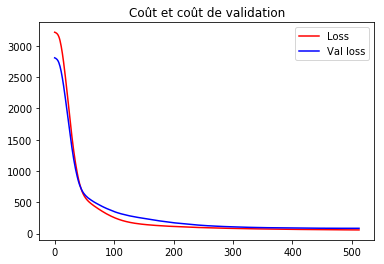

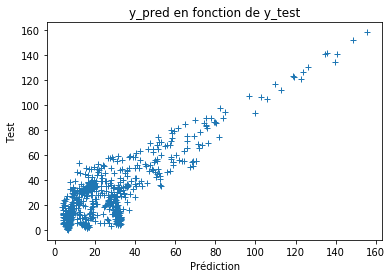

In [10]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [11]:
def lstm_plus_dense(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    model.add(Dense(nb_units, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    
    return model

In [12]:
model = lstm_plus_dense(32, X_train.shape[1:])
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 1s - loss: 3218.3371 - val_loss: 2808.9047
Epoch 2/1000
1206/1206 [==============================] - 0s - loss: 3212.4947 - val_loss: 2802.0361
Epoch 3/1000
1206/1206 [==============================] - 0s - loss: 3202.5369 - val_loss: 2789.9576
Epoch 4/1000
1206/1206 [==============================] - 0s - loss: 3184.3532 - val_loss: 2768.2635
Epoch 5/1000
1206/1206 [==============================] - 0s - loss: 3149.7488 - val_loss: 2729.9859
Epoch 6/1000
1206/1206 [==============================] - 0s - loss: 3088.3597 - val_loss: 2663.8893
Epoch 7/1000
1206/1206 [==============================] - 0s - loss: 2987.5042 - val_loss: 2561.3332
Epoch 8/1000
1206/1206 [==============================] - 0s - loss: 2830.2735 - val_loss: 2413.5678
Epoch 9/1000
1206/1206 [==============================] - 0s - loss: 2606.4232 - val_loss: 2222.2499
Epoch 10/1000
1206/1206 [===================

1206/1206 [==============================] - 0s - loss: 127.9436 - val_loss: 182.2576
Epoch 83/1000
1206/1206 [==============================] - 0s - loss: 126.6346 - val_loss: 179.8706
Epoch 84/1000
1206/1206 [==============================] - 0s - loss: 125.3813 - val_loss: 177.5645
Epoch 85/1000
1206/1206 [==============================] - 0s - loss: 124.1239 - val_loss: 176.2255
Epoch 86/1000
1206/1206 [==============================] - 0s - loss: 122.7766 - val_loss: 173.0343
Epoch 87/1000
1206/1206 [==============================] - 0s - loss: 121.4744 - val_loss: 171.6571
Epoch 88/1000
1206/1206 [==============================] - 0s - loss: 120.5508 - val_loss: 169.7432
Epoch 89/1000
1206/1206 [==============================] - 0s - loss: 119.1616 - val_loss: 168.2084
Epoch 90/1000
1206/1206 [==============================] - 0s - loss: 118.0530 - val_loss: 165.7878
Epoch 91/1000
1206/1206 [==============================] - 0s - loss: 116.8902 - val_loss: 164.2996
Epoch 92/1000


1206/1206 [==============================] - 0s - loss: 65.5511 - val_loss: 109.6804
Epoch 164/1000
1206/1206 [==============================] - 0s - loss: 65.0768 - val_loss: 107.2623
Epoch 165/1000
1206/1206 [==============================] - 0s - loss: 64.8248 - val_loss: 108.1084
Epoch 166/1000
1206/1206 [==============================] - 0s - loss: 64.3366 - val_loss: 107.3552
Epoch 167/1000
1206/1206 [==============================] - 0s - loss: 64.0502 - val_loss: 108.0940
Epoch 168/1000
1206/1206 [==============================] - 0s - loss: 63.5205 - val_loss: 106.8056
Epoch 169/1000
1206/1206 [==============================] - 0s - loss: 63.2292 - val_loss: 107.2650
Epoch 170/1000
1206/1206 [==============================] - 0s - loss: 62.9036 - val_loss: 105.8022
Epoch 171/1000
1206/1206 [==============================] - 0s - loss: 62.5343 - val_loss: 105.4553
Epoch 172/1000
1206/1206 [==============================] - 0s - loss: 62.1518 - val_loss: 104.7228
Epoch 173/1000


In [13]:
model.evaluate(X_test, y_test, verbose=0)

160.08396618571501

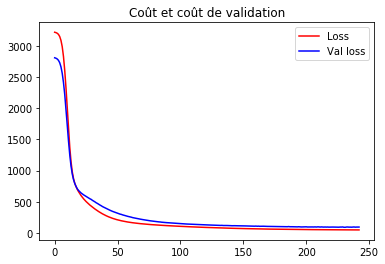

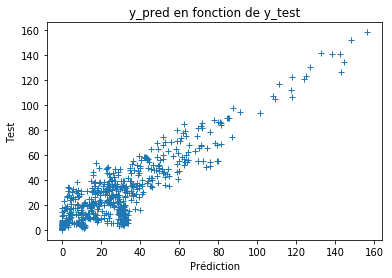

In [14]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()